Zrinka Pećanić<br>
*0036517187*<br>
*FER*<br>

**Predmet: Uvod u znanost o podacima**<br>
<br>
Naziv članka: *A Machine Learning Approach for the 
Classification of Cardiac Arrhythmia* <br>



**2. faza projekta**<br><br>
Ciljevi: 


*   napraviti PCA
*   napraviti klasifikaciju koristeći SVM, LR, RF, K-nn i dobiti rezultate kao u članku (ili slično tome)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn
import scipy as sp
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.svm import SVC


In [2]:
# ucitavanje obradenog (ociscenog) dataseta data_edited.csv

u_data = pd.read_csv('/content/data_edited.csv')
print(len(u_data)) #broj primjera
print(len(u_data.columns)) #broj znacajki

#trebamo izbaciti zadnju kolonu Class i ona je naš y, ostalih 278 je X

452
279


In [3]:
#lista naziva kolona
features = ['Age', 'Sex', 'Height', 'Weight', 'QRSduration', 'PRinterval', 'QTinterval', 'Tinterval', 'Pinterval', 'QRSangle', 'Tangle', 'Pangle', 'QRSTangle', 'HeartRate', 'DIQwidth', 'DIRwidth', 'DISwidth', 'DISmallRwidth', 'DISmallSwidth', 'DIIntDeflNum', 'DIRaggedR', 'DIDiphasicR', 'DIRaggedP', 'DIDiphasicP', 'DIRaggedT', 'DIDiphasicT', 'DIIQwidth', 'DIIRwidth', 'DIISwidth', 'DIISmallRwidth', 'DIISmallSwidth', 'DIIIntDeflNum', 'DIIRaggedR', 'DIIDiphasicR', 'DIIRaggedP', 'DIIDiphasicP', 'DIIRaggedT', 'DIIDiphasicT', 'DIIIQwidth', 'DIIIRwidth', 'DIIISwidth', 'DIIISmallRwidth', 'DIIISmallSwidth', 'DIIIIntDeflNum', 'DIIIRaggedR', 'DIIIDiphasicR', 'DIIIRaggedP', 'DIIIDiphasicP', 'DIIIRaggedT', 'DIIIDiphasicT', 'AVRQwidth', 'AVRRwidth', 'AVRSwidth', 'AVRSmallRwidth', 'AVRSmallSwidth', 'AVRIntDeflNum', 'AVRRaggedR', 'AVRDiphasicR', 'AVRRaggedP', 'AVRDiphasicP', 'AVRRaggedT', 'AVRDiphasicT', 'AVLQwidth', 'AVLRwidth', 'AVLSwidth', 'AVLSmallRwidth', 'AVLSmallSwidth', 'AVLIntDeflNum', 'AVLRaggedR', 'AVLDiphasicR', 'AVLRaggedP', 'AVLDiphasicP', 'AVLRaggedT', 'AVLDiphasicT', 'AVFQwidth', 'AVFRwidth', 'AVFSwidth', 'AVFSmallRwidth', 'AVFSmallSwidth', 'AVFIntDeflNum', 'AVFRaggedR', 'AVFDiphasicR', 'AVFRaggedP', 'AVFDiphasicP', 'AVFRaggedT', 'AVFDiphasicT', 'V1Qwidth', 'V1Rwidth', 'V1Swidth', 'V1SmallRwidth', 'V1SmallSwidth', 'V1IntDeflNum', 'V1RaggedR', 'V1DiphasicR', 'V1RaggedP', 'V1DiphasicP', 'V1RaggedT', 'V1DiphasicT', 'V2Qwidth', 'V2Rwidth', 'V2Swidth', 'V2SmallRwidth', 'V2SmallSwidth', 'V2IntDeflNum', 'V2RaggedR', 'V2DiphasicR', 'V2RaggedP', 'V2DiphasicP', 'V2RaggedT', 'V2DiphasicT', 'V3Qwidth', 'V3Rwidth', 'V3Swidth', 'V3SmallRwidth', 'V3SmallSwidth', 'V3IntDeflNum', 'V3RaggedR', 'V3DiphasicR', 'V3RaggedP', 'V3DiphasicP', 'V3RaggedT', 'V3DiphasicT', 'V4Qwidth', 'V4Rwidth', 'V4Swidth', 'V4SmallRwidth', 'V4SmallSwidth', 'V4IntDeflNum', 'V4RaggedR', 'V4DiphasicR', 'V4RaggedP', 'V4DiphasicP', 'V4RaggedT', 'V4DiphasicT', 'V5Qwidth', 'V5Rwidth', 'V5Swidth', 'V5SmallRwidth', 'V5SmallSwidth', 'V5IntDeflNum', 'V5RaggedR', 'V5DiphasicR', 'V5RaggedP', 'V5DiphasicP', 'V5RaggedT', 'V5DiphasicT', 'V6Qwidth', 'V6Rwidth', 'V6Swidth', 'V6SmallRwidth', 'V6SmallSwidth', 'V6IntDeflNum', 'V6RaggedR', 'V6DiphasicR', 'V6RaggedP', 'V6DiphasicP', 'V6RaggedT', 'V6DiphasicT', 'DIJJamp', 'DIQamp', 'DIRamp', 'DISamp', 'DISmallRamp', 'DISmallSamp', 'DIPamp', 'DITamp', 'DIQRSA', 'DIQRSTA', 'DIIJJamp', 'DIIQamp', 'DIIRamp', 'DIISamp', 'DIISmallRamp', 'DIISmallSamp', 'DIIPamp', 'DIITamp', 'DIIQRSA', 'DIIQRSTA', 'DIIIJJamp', 'DIIIQamp', 'DIIIRamp', 'DIIISamp', 'DIIISmallRamp', 'DIIISmallSamp', 'DIIIPamp', 'DIIITamp', 'DIIIQRSA', 'DIIIQRSTA', 'AVRJJamp', 'AVRQamp', 'AVRRamp', 'AVRSamp', 'AVRSmallRamp', 'AVRSmallSamp', 'AVRPamp', 'AVRTamp', 'AVRQRSA', 'AVRQRSTA', 'AVLJJamp', 'AVLQamp', 'AVLRamp', 'AVLSamp', 'AVLSmallRamp', 'AVLSmallSamp', 'AVLPamp', 'AVLTamp', 'AVLQRSA', 'AVLQRSTA', 'AVFJJamp', 'AVFQamp', 'AVFRamp', 'AVFSamp', 'AVFSmallRamp', 'AVFSmallSamp', 'AVFPamp', 'AVFTamp', 'AVFQRSA', 'AVFQRSTA', 'V1JJamp', 'V1Qamp', 'V1Ramp', 'V1Samp', 'V1SmallRamp', 'V1SmallSamp', 'V1Pamp', 'V1Tamp', 'V1QRSA', 'V1QRSTA', 'V2JJamp', 'V2Qamp', 'V2Ramp', 'V2Samp', 'V2SmallRamp', 'V2SmallSamp', 'V2Pamp', 'V2Tamp', 'V2QRSA', 'V2QRSTA', 'V3JJamp', 'V3Qamp', 'V3Ramp', 'V3Samp', 'V3SmallRamp', 'V3SmallSamp', 'V3Pamp', 'V3Tamp', 'V3QRSA', 'V3QRSTA', 'V4JJamp', 'V4Qamp', 'V4Ramp', 'V4Samp', 'V4SmallRamp', 'V4SmallSamp', 'V4Pamp', 'V4Tamp', 'V4QRSA', 'V4QRSTA', 'V5JJamp', 'V5Qamp', 'V5Ramp', 'V5Samp', 'V5SmallRamp', 'V5SmallSamp', 'V5Pamp', 'V5Tamp', 'V5QRSA', 'V5QRSTA', 'V6JJamp', 'V6Qamp', 'V6Ramp', 'V6Samp', 'V6SmallRamp', 'V6SmallSamp', 'V6Pamp', 'V6Tamp', 'V6QRSA', 'V6QRSTA']
X = u_data.loc[:, features].values

y = u_data.loc[:,['Class']].values

#print(len(X)) 
print(X.shape)
#print(len(y))
print(y.shape)
#print(X)
#print(y)

(452, 278)
(452, 1)


Sada ćemo najprije skalirati sve podatke koristeći StandardScaler.

In [4]:
# data scaling za sve podatke
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

Radimo PC analizu, nad svim komponentama. Zatim ćemo napraviti scree plot da vidimo koliko nam je komponenata zaista potrebno i možemo li smanjiti dimenzionalnost ulaznog skupa podataka.

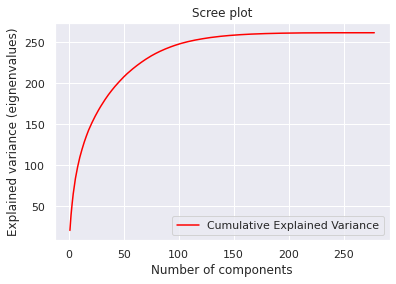

In [5]:
from sklearn.decomposition import PCA
sns.set()
 
#PCA za sve znacajke
pca1 = PCA(n_components=278)
 
# Fit and transform data
X_pca = pca1.fit_transform(X_scaled)

plt.plot(
    range(1,len(pca1.explained_variance_ )+1),
    np.cumsum(pca1.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
 
plt.legend(loc='lower right')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
 
plt.show()

Iz grafa je vidljivo da je gotovo sva varijanca obuhvaćena sa 150 značajki - taj smo rezultat očekivali jer je tako i u članku. Znači da možemo nastaviti rad s podacima tako da smanjimo 278 značajki na njih 150.

In [35]:
#sada trebamo podijeliti originalni dataset na train i test grupe, u članku se koristi 125 testnih primjera pa ćemo i mi tako

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 125)

#trebamo ih i standardizirati, pritom pazeći na fit i transform za train i test

sc = StandardScaler()
  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#na kraju, prije primjene ML algoritama smanjujemo dimenzionalnost na 150 značajki
pca = PCA(n_components = 150)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(327, 150)
(125, 150)


Sada možemo koristiti dobiveni dataset za klasifikaciju. Koristimo sljedeće algoritme: SVM, K-nn, logističku regresiju i random forest algoritam.

Za nalaženje optimalnih parametara koristimo ugrađenu implementaciju iz `sklearn.model_selection` - GridSearchCV.

In [36]:
#SVM kao klasifikator - hiperparametri su jezgra, C, gama

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'gamma': [0.1, 0.01, 0.001, 0.0009, 0.0005, 0.0001]}
svm = SVC()

svm_gs = GridSearchCV(svm, parameters)
svm_gs.fit(X_train, y_train)
GridSearchCV(estimator=SVC(), param_grid=parameters, scoring='accuracy', cv=10)

print("najbolji hiperparametri: ", svm_gs.best_params_)
print("accuracy s najboljim parametrima: ", svm_gs.best_score_)


najbolji hiperparametri:  {'C': 13, 'gamma': 0.0005, 'kernel': 'rbf'}
accuracy s najboljim parametrima:  0.730955710955711


In [37]:
#K-nn kao klasifikator - hiperparametar je k (broj susjeda)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
parameters = dict(n_neighbors=k_range)

knn_gs = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')

knn_gs.fit(X_train, y_train)

print("najbolji hiperparametri: ", knn_gs.best_params_)
print("accuracy s najboljim parametrima: ", knn_gs.best_score_)

najbolji hiperparametri:  {'n_neighbors': 3}
accuracy s najboljim parametrima:  0.6146780303030303


In [38]:
#Logistička regresija kao klasifikator - hiperparametri su regularizacija (penalty), C, solver
parameters = {'penalty': ['l1','l2'], 'C': np.logspace(-3,3,7), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}

logreg = LogisticRegression()
logreg_gs = GridSearchCV(logreg, param_grid = parameters, scoring='accuracy', cv=10)

logreg_gs.fit(X_train, y_train)

print("najbolji hiperparametri: ", logreg_gs.best_params_)
print("accuracy s najboljim parametrima: ", logreg_gs.best_score_)

najbolji hiperparametri:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy s najboljim parametrima:  0.7036931818181819


In [39]:
#Random forest algoritam kao klasifikator - ima puno hiperparametara - max dubinu, criterion, min broj listova, broj stabala (n_estimatora)
rfc=RandomForestClassifier()
#parameters = {'n_estimators': [10, 20, 30, 40], 'max_features': ['sqrt', 'log2'], 'max_depth' : [6, 7, 8, 9], 'criterion' :['gini', 'entropy', 'log_loss'], 'min_samples_leaf':[1, 2, 3]} # daje 0.59 accuracy s najboljim parametrima
parameters={'max_depth':[100, 150, 200, 250], 'n_estimators':[10, 20, 30, 40, 50], 'min_samples_leaf':[1, 2, 3, 4]}
rfc_gs = GridSearchCV(estimator=rfc, param_grid=parameters, cv=10)
rfc_gs.fit(X_train, y_train)

print("najbolji hiperparametri: ", rfc_gs.best_params_)
print("accuracy s najboljim parametrima: ", rfc_gs.best_score_)

najbolji hiperparametri:  {'max_depth': 250, 'min_samples_leaf': 1, 'n_estimators': 40}
accuracy s najboljim parametrima:  0.5933712121212121


Prikazat ćemo uspješnost klasifikatora na test datasetu.

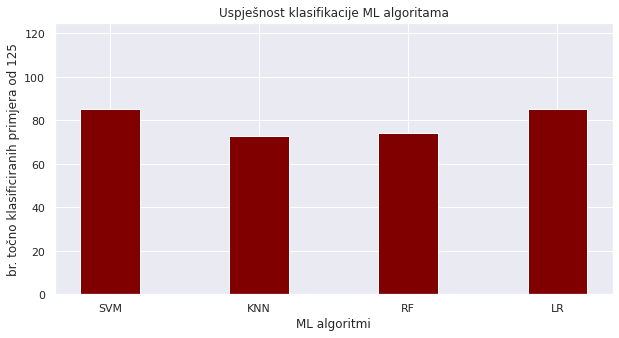

In [40]:
svm_t = SVC(C = 13, kernel = 'rbf', gamma = 0.0005).fit(X_train, y_train)

knn_t = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

logreg_t = LogisticRegression(C= 0.1, penalty = 'l2', solver = 'newton-cg').fit(X_train, y_train)

rfc_t = RandomForestClassifier(max_depth = 250, min_samples_leaf = 1, n_estimators = 40).fit(X_train, y_train)

svm_pred = svm_t.predict(X_test)
knn_pred = knn_t.predict(X_test)
logreg_pred = logreg_t.predict(X_test)
rfc_pred = rfc_t.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
knn_acc = accuracy_score(y_test, knn_pred)
logreg_acc = accuracy_score(y_test, logreg_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)

bar_data = dict()
bar_data['SVM'] = int(svm_acc*125)
bar_data['KNN'] = int(knn_acc*125)
bar_data['RF'] = int(rfc_acc*125)
bar_data['LR'] = int(logreg_acc*125)

algs = list(bar_data.keys())
values = list(bar_data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.ylim(top=125)
plt.bar(algs, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ML algoritmi")
plt.ylabel("br. točno klasificiranih primjera od 125")
plt.title("Uspješnost klasifikacije ML algoritama")
plt.show()
